## 第8回課題: ハッブル-ルメートルの法則

- [Calán/Tololo Supernova Survey](https://en.wikipedia.org/wiki/Calán/Tololo_Survey)の超新星データ

- [Perlmutter et al. (1999)](https://iopscience.iop.org/article/10.1086/307221) から取得

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 日本語も使えるようにしておく。
!pip install japanize_matplotlib
import japanize_matplotlib

### 課題1: データの読み込み

supernovae.txt から、列"z"と列"m"を配列として取り出そう。zは赤方偏移、mは最大光度のときの超新星の見かけの等級（見かけの明るさを対数で表す尺度; 以下参照）を表す。

In [3]:
data = pd.read_csv("supernovae.txt") # データの読み込み
z = np.array(data["z"]) # 赤方偏移
m = np.array(data["m"]) # 最大光度のときの超新星の見かけの等級

### 課題2: 赤方偏移$z$を後退速度$v$に換算

ここに含まれる比較的近傍の超新星については、赤方偏移$z=\Delta\lambda/\lambda$（波長の伸びた割合）と後退速度$v$の間に
$$
    z = {v\over c}
$$
の関係がある。ただし$c$は真空中の光速度で、値は$c\approx 3\times10^5\,\mathrm{km/s}$である。この関係を用いて、$z$を後退速度$v$（単位は$\mathrm{km/s}$）に換算しよう。

In [4]:
c = 3e5 # km/s
v = c * z # km/s単位の速度

In [5]:
v

array([ 9000., 15000.,  7800., 22500.,  7800.,  4200., 30300.,  6000.,
       10800., 13500., 12900., 23700., 18900., 21300., 15600., 15000.])

### 課題3: 見かけの等級$m$から距離$d$を推定

データ中の見かけの等級$m$は、天体の見かけの明るさ$f$（正確には単位時間・単位面積あたりに地球に届くエネルギー）を対数を使って表す尺度である。必ずしも対数を使う必然性はないが、天文学では歴史的な背景からよく用いられる。

天体の見かけの明るさと見かけの等級の関係は、ある定数$C$を用いて
$$
m = C - 2.5\log_{10} f 
$$
で与えられる。$C$の値はここでは気にしなくて良い。たとえば$f$が100倍増える（明るくなる）と、$\log_{10}f$は2増えるので、等級$m$は5減る。つまり、**等級は明るい方が小さい**ことに注意する。$f$について解くと、
$$
\log_{10} f = 0.4(C-m)
$$
より
$$
f = 10^{0.4(C-m)} = k10^{-0.4m}, \quad k=10^{0.4C}
$$
となることがわかる（$k$は定数）。以下では最右辺の関係式を用いる。

このデータ中のIa型超新星は全て、距離$D=10\,\mathrm{pc}$（年周視差が$0.1$秒角になる距離; おおよそ$3.1\times10^{14}\,\mathrm{km}$）に置いたとき、見かけの等級がおおよそ$M=-19.3$になることが知られている（つまり真の明るさがわかっている）。したがって、距離$D$での見かけの明るさを$F$とすると
$$
F = k10^{-0.4M}, \quad M=-19.3
$$
である。

この事実を用いて、データで与えられたIa型超新星の$m$から距離$d$を推定しよう。見かけの明るさ$f$は距離の2乗に反比例する（逆二乗の法則）から
$$
f = F\cdot \left(D \over d\right)^2
$$
となる。これを$d$について解くと、
$$
\left(d \over D\right)^2 = {F \over f} \quad \to \quad d = D\sqrt{F \over f}
$$
となる。よって上で導いた$f$, $F$の式から、
$$
    d = D\sqrt{F\over f} = D \cdot \left[10^{-0.4(M-m)}\ \ \right]^{1/2} = D \cdot 10^{-0.2(M-m)}\ = D \cdot 10^{0.2(m-M)}
$$
となる。ここで$D=10\,\mathrm{pc}$, $M=-19.3$である。

最後の式を用いて、$m$の値からデータ中のIa型超新星の距離$d$を求めよう。$\,\mathrm{pc}$単位だと数が大きくなるので、単位は$\,\mathrm{Mpc}=10^6\,\mathrm{pc}$にしよう。

In [6]:
M = -19.3
d_pc = 10 * 10**(0.2 * (m - M)) # pc単位での距離
d_Mpc = d_pc / 1e6 # Mpc単位に変換

### 課題4: 後退速度$v$と距離$d$の関係（ハッブル-ルメートルの法則）

上で求めた$v$ ($\mathrm{km/s}$)を縦軸、$d$ ($\mathrm{Mpc}$)を横軸にしてデータを点でプロットしてみよう。軸のラベルも入れること。

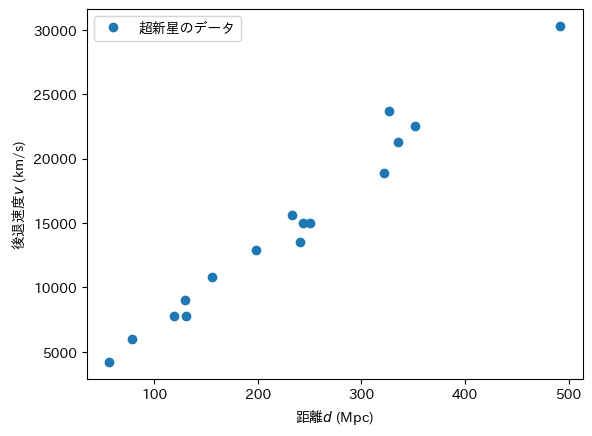

In [7]:
plt.plot(d_Mpc, v, "o", label="超新星のデータ")
plt.xlabel("距離$d$ (Mpc)")
plt.ylabel("後退速度$v$ (km/s)")
plt.legend(loc="best");

比例関係になっていそうなのがわかるはずである。

### 課題5: ハッブル定数の計算

最小二乗法を用いて上のグラフの傾き$H_0$（ハッブル定数）を km/s/Mpc 単位で求めてみよう。ハッブル定数の定義の式$v=H_0 d$ではy切片が0に固定されているが、ここでは気にしなくてよい（もし余裕があれば、$y=ax$を仮定したときのy方向のずれの2乗和 $\sum_i (y_i - ax_i)^2$ の$a$での微分が0となる条件から、この和を最小にする$a$を求めてもよい）。

最小二乗法で得られた直線とデータを共にプロットし、データが直線に乗っていることを確認しよう。

(1) [lecture3_kepler3.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture3_kepler3/lecture3_kepler3.ipynb)で定義した関数least_squaresを使う場合

In [8]:
def least_squares(x, y):
    """配列x, yから、最小二乗法（least squares）で傾きA, y切片Bを計算する関数"""
    X = np.sum(x)
    Y = np.sum(y)
    S = np.sum(x*x)
    C = np.sum(x*y)
    N = len(x)

    den = N * S - X * X # 分母（denominator）は共通なので一度だけ計算した
    A = (N * C - X * Y) / den 
    B = (S * Y - C * X) / den

    return A, B

In [9]:
H0_1, b_1 = least_squares(d_Mpc, v)
print(H0_1)

60.998894424585934


(2) $y=ax$を仮定したときのy方向のずれの2乗和 $\sum_i (y_i - ax_i)^2$ を最小にする場合

この和を$S$とおくと、
$$
{\mathrm{d}S \over \mathrm{d}a} = \sum_{i=1}^N -2x_i(y_i - ax_i) = 2 a \sum_{i=1}^N x_i^2 - 2 \sum_{i=1}^N x_i y_i
$$
である。よって$S$を最小にする$a$は、$\mathrm{d}S/\mathrm{d}a=0$より
$$
a = {\sum_{i=1}^N x_i y_i \over \sum_{i=1}^N x_i^2}
$$
となる。

In [10]:
H0 = np.sum(d_Mpc * v) / np.sum(d_Mpc**2)
print(H0)

63.36191436037001


(1)ではy切片（b_1）が0になっていなかったので、(2)の方法でやると傾きが少し異なる。両方プロットしてみよう。

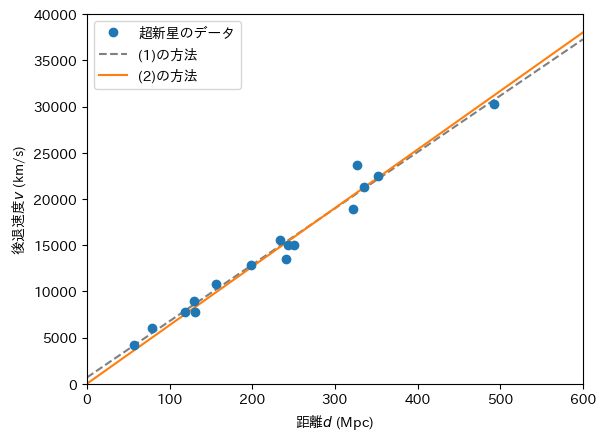

In [11]:
plt.plot(d_Mpc, v, "o", label="超新星のデータ", zorder=1000)
plt.xlabel("距離$d$ (Mpc)")
plt.ylabel("後退速度$v$ (km/s)")
x = np.linspace(0, 600, 100) # 直線をプロットするための配列を定義
plt.plot(x, H0_1 * x + b_1, label="(1)の方法", color="gray", ls='dashed')
plt.plot(x, H0 * x, label='(2)の方法')
plt.xlim(0, 600)
plt.ylim(0, 40000)
plt.legend(loc="best");

以下では(2)の結果を使う。

### 課題6: 宇宙の年齢の概算

上で求めた$H_0$の単位は$\mathrm{km/s/Mpc}$になっている。$1\,\mathrm{pc}$は年周視差が$1''=(1/3600)\,\mathrm{deg}$（degは度）になる距離だから、
$$
1\,\mathrm{pc} = {1\,\mathrm{au} \over (1/3600)\,\mathrm{deg}}
$$
である。まず$1\,\mathrm{au}=1.5\times10^8\,\mathrm{km}$として$1\,\mathrm{pc}$を$\mathrm{km}$単位に換算し（degをラジアンに直す必要があることに注意）、$\mathrm{km/Mpc}$の値を計算しよう。

さらにその結果を用いて、$H_0$の逆数 $1/H_0$（これは時間になる）を億年の単位で求めよう。第8回の講義で触れたように、これは宇宙のおおよその年齢を与える。

解説：上の結果から、
$$
t_\mathrm{H} = {1 \over H_0} = {1\over 63.36...}\,\mathrm{s}\cdot \mathrm{Mpc\over km}
$$
で、Mpcとkmはどちらも長さだからこれは時間になっている。Mpcをkm単位で表せばこの値が秒単位で得られる。

In [12]:
pc_in_km = 1.5e8 / (1/3600 * np.pi / 180.) # pcをkm単位で表す（つまりpc/km）
Mpc_in_km = 1e6 * pc_in_km #　Mpcをkm単位で表す（つまりMpc/km）

これより$t_\mathrm{H}$は秒単位で

In [13]:
tH_sec = 1. / H0 * Mpc_in_km # 秒単位

これを年にするには1年の秒数で割ればよい。

In [14]:
year_in_sec = 365.25 * 86400

In [15]:
tH_yr = tH_sec / year_in_sec

In [16]:
tH_yr

15473342368.084396

つまりこのデータから求めた$1/H_0$は約$1.5\times 10^9$年（$150$億年）になる。これはおおよその宇宙の年齢と考えられ、[ハッブル時間](https://astro-dic.jp/hubble-time/)と呼ばれる。実際、ハッブル-ルメートルの法則$v=H_0 d$を用いて距離/速度を計算すると
$$
{d \over v} = {d \over H_0 d} = {1 \over H_0}
$$
となっている。つまり、$v$がずっと一定なら、時間$1/H_0$遡ると宇宙が一点に集まる。

より現実的な宇宙膨張のモデルと最新のデータを用いて推定した宇宙年齢は上の値よりやや小さく138億年程度である。